In [0]:
#import tensorflow as tf
from tensorflow.python.keras.applications import VGG16
temp_model=VGG16(include_top=True,weights='imagenet')

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
temp_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [0]:
#from google.colab import drive
#drive.mount()
import keras
from tensorflow.python.keras.models import Sequential 
from tensorflow.python.keras.layers import Dense,Flatten,Dropout
from tensorflow.python.keras import Model

Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
change_layer=temp_model.get_layer('fc2')

In [0]:
half_model=Model(inputs=temp_model.input,outputs=change_layer.output)
#modified_model=sequential()
half_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [0]:
modified_model=Sequential()
modified_model.add(half_model)

In [0]:
modified_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model (Model)                (None, 4096)              134260544 
Total params: 134,260,544
Trainable params: 134,260,544
Non-trainable params: 0
_________________________________________________________________


In [0]:
modified_model.add(Dropout(0.5))
modified_model.add(Dense(92,activation='softmax'))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
modified_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model (Model)                (None, 4096)              134260544 
_________________________________________________________________
dropout (Dropout)            (None, 4096)              0         
_________________________________________________________________
dense (Dense)                (None, 92)                376924    
Total params: 134,637,468
Trainable params: 134,637,468
Non-trainable params: 0
_________________________________________________________________


In [0]:
from tensorflow.python.keras.optimizers import Adam
optimizer=Adam(lr=1e-5)

In [0]:
loss='categorical_crossentropy'
metrics=['categorical_accuracy']

In [0]:
for layer in half_model.layers:
  print("{0}: /t{1}".format(layer.trainable,layer))

True: /t<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7fded49051d0>
True: /t<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fde8a3cf358>
True: /t<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fdeea81f5f8>
True: /t<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fde8960be48>
True: /t<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fde89e69d30>
True: /t<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fde895af978>
True: /t<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fde895e95f8>
True: /t<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fde895e95c0>
True: /t<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fde8959db00>
True: /t<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fde8954b0f0>
True: /t<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fde894fdb70>
True: /t<tensorflow.python.keras.layers.c

In [0]:
half_model.trainable=False

In [0]:
for layer in half_model.layers:
  layer.trainable=False

In [0]:
for layer in half_model.layers:
  print("{0}: /t{1}".format(layer.trainable,layer))

False: /t<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7fded49051d0>
False: /t<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fde8a3cf358>
False: /t<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fdeea81f5f8>
False: /t<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fde8960be48>
False: /t<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fde89e69d30>
False: /t<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fde895af978>
False: /t<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fde895e95f8>
False: /t<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fde895e95c0>
False: /t<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fde8959db00>
False: /t<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fde8954b0f0>
False: /t<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fde894fdb70>
False: /t<tensorflow.python.ke

In [0]:
for layer in modified_model.layers:
  print(layer.trainable,layer)

False <tensorflow.python.keras.engine.training.Model object at 0x7fdee3dde438>
True <tensorflow.python.keras.layers.core.Dropout object at 0x7fde70fbaeb8>
True <tensorflow.python.keras.layers.core.Dense object at 0x7fde70fba2e8>


In [0]:
modified_model.compile(optimizer=optimizer,loss=loss,metrics=metrics)

In [0]:
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import preprocess_input

In [0]:
train_data_gen=ImageDataGenerator(preprocessing_function=preprocess_input,horizontal_flip=True)
val_data_gen=ImageDataGenerator(preprocessing_function=preprocess_input)
test_data_gen=ImageDataGenerator(preprocessing_function=preprocess_input)

In [0]:
#-------------------------------------------------------UPLOADING THE TRAINING DATA IN DATA-GENERATOR
#IT AUTOMATICALLY TAKES IN DIRECTORY NAMES AS CLASS NAMES
generator_train=train_data_gen.flow_from_directory(directory='/content/gdrive/My Drive/Splitted_SBIR_Data/Images_Balanced/Training',target_size=(224,224),
                                              batch_size=256,shuffle=True)

Found 5888 images belonging to 92 classes.


In [0]:
#-------------------------------------------------------UPLOADING THE VALIDATION DATA IN DATA-GENERATOR
generator_val=val_data_gen.flow_from_directory(directory='/content/gdrive/My Drive/Splitted_SBIR_Data/Images_Balanced/Validation',target_size=(224,224),
                                         batch_size=256,shuffle=True)

Found 736 images belonging to 92 classes.


In [0]:
import os
import tensorflow as tf
checkpoint_path = "/content/gdrive/My Drive/training_1/cp.ckpt"
#checkpoint_dir = os.path.dirname(checkpoint_path)

# Create checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, save_weights_only=True, verbose=1)
trainer_imgs=modified_model.fit_generator(generator=generator_train,epochs=25,steps_per_epoch=23
                                         ,validation_data=generator_val)
#TPU_WORKER = 'grpc://' + os.environ['COLAB_TPU_ADDR']
#tf.logging.set_verbosity(tf.logging.INFO)

#tpu_model = tf.contrib.tpu.keras_to_tpu_model(modified_model, strategy=tf.contrib.tpu.TPUDistributionStrategy(tf.contrib.cluster_resolver.TPUClusterResolver(TPU_WORKER)))

Instructions for updating:
Use tf.cast instead.
Epoch 1/25
23/23 [==============================] - 66s 3s/step - loss: 7.0099 - categorical_accuracy: 0.0099 - val_loss: 5.6023 - val_categorical_accuracy: 0.0163
Epoch 2/25
23/23 [==============================] - 36s 2s/step - loss: 6.7707 - categorical_accuracy: 0.0136 - val_loss: 5.4036 - val_categorical_accuracy: 0.0217
Epoch 3/25
23/23 [==============================] - 37s 2s/step - loss: 6.5928 - categorical_accuracy: 0.0177 - val_loss: 5.2135 - val_categorical_accuracy: 0.0245
Epoch 4/25
23/23 [==============================] - 37s 2s/step - loss: 6.3984 - categorical_accuracy: 0.0182 - val_loss: 5.0416 - val_categorical_accuracy: 0.0312
Epoch 5/25
23/23 [==============================] - 36s 2s/step - loss: 6.2216 - categorical_accuracy: 0.0204 - val_loss: 4.8647 - val_categorical_accuracy: 0.0421
Epoch 6/25
23/23 [==============================] - 37s 2s/step - loss: 6.0551 - categorical_accuracy: 0.0306 - val_loss: 4.6990 - v

In [0]:
half_model.trainable=True

In [0]:
for layer in half_model.layers:
  #print(layer.trainable, layer)
  layer.trainable=True
  #print(layer.trainable, layer)

In [0]:
modified_model.trainable

True

In [0]:
for layer in modified_model.layers:
  print(layer.trainable)

True
True
True


In [0]:
modified_model.compile(optimizer=Adam(lr=1e-6),loss='categorical_crossentropy',metrics=['categorical_accuracy'])

In [0]:
generator_train_new=train_data_gen.flow_from_directory(directory='/content/gdrive/My Drive/Splitted_SBIR_Data/Images_Balanced/Training',target_size=(224,224),
                                              batch_size=64,shuffle=True)

Found 5888 images belonging to 92 classes.


In [0]:
generator_val_new=val_data_gen.flow_from_directory(directory='/content/gdrive/My Drive/Splitted_SBIR_Data/Images_Balanced/Validation',target_size=(224,224),
                                              batch_size=64,shuffle=True)

Found 736 images belonging to 92 classes.


In [0]:
from tensorflow.keras.callbacks import ModelCheckpoint
check_point=ModelCheckpoint('/content/gdrive/My Drive/Best_Model/Image/image.h5',verbose=1,monitor='val_loss',save_best_only=True,mode='auto',period=1)

In [0]:
trainer_new=modified_model.fit_generator(generator=generator_train_new,epochs=20,steps_per_epoch=92,validation_data=generator_val_new,callbacks=[check_point])

Epoch 1/20
12/12 [==============================] - 7s 618ms/step - loss: 2.3961 - categorical_accuracy: 0.4457

Epoch 00001: val_loss improved from inf to 2.39605, saving model to /content/gdrive/My Drive/Best_Model/Image/sktch.h5
92/92 [==============================] - 135s 1s/step - loss: 3.2608 - categorical_accuracy: 0.2376 - val_loss: 2.3961 - val_categorical_accuracy: 0.4457
Epoch 2/20
12/12 [==============================] - 5s 382ms/step - loss: 2.1507 - categorical_accuracy: 0.5068

Epoch 00002: val_loss improved from 2.39605 to 2.15073, saving model to /content/gdrive/My Drive/Best_Model/Image/sktch.h5
92/92 [==============================] - 120s 1s/step - loss: 2.8527 - categorical_accuracy: 0.3106 - val_loss: 2.1507 - val_categorical_accuracy: 0.5068
Epoch 3/20
12/12 [==============================] - 5s 387ms/step - loss: 1.8815 - categorical_accuracy: 0.5625

Epoch 00003: val_loss improved from 2.15073 to 1.88149, saving model to /content/gdrive/My Drive/Best_Model/Ima

In [0]:
trainer_new.history.keys()

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])

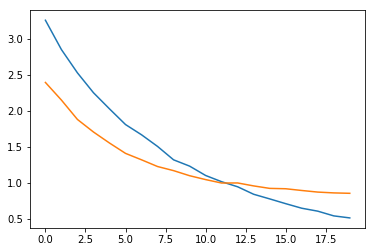

In [0]:
import matplotlib.pyplot as plt
plt.plot(trainer_new.history['loss'])
plt.plot(trainer_new.history['val_loss'])

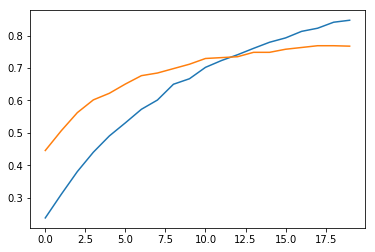

In [0]:
import matplotlib.pyplot as plt
plt.plot(trainer_new.history['categorical_accuracy'])
plt.plot(trainer_new.history['val_categorical_accuracy'])

In [0]:
modified_model.get_weights()

[array([[[[ 4.29535538e-01,  1.17315061e-01,  3.39706093e-02, ...,
           -1.32376164e-01, -5.34224585e-02,  7.50962086e-03],
          [ 5.50365627e-01,  2.09494978e-02,  9.88215655e-02, ...,
           -8.49111080e-02, -5.11702709e-02,  3.74233387e-02],
          [ 4.79862392e-01, -1.72523543e-01,  3.74598764e-02, ...,
           -1.27261981e-01, -5.04055209e-02,  3.47406268e-02]],
 
         [[ 3.73534203e-01,  1.62103176e-01,  1.67270645e-03, ...,
           -1.48354337e-01, -2.35381648e-01, -6.31022304e-02],
          [ 4.40066338e-01,  4.74094525e-02,  5.13814501e-02, ...,
           -9.89557356e-02, -2.96235234e-01, -7.05070123e-02],
          [ 4.08397704e-01, -1.70203462e-01, -5.04600583e-03, ...,
           -1.22500561e-01, -2.76560456e-01, -3.92342284e-02]],
 
         [[-6.12969957e-02,  1.35743871e-01, -1.15728162e-01, ...,
           -1.40298203e-01, -3.77746224e-01, -3.00583184e-01],
          [-8.14047903e-02,  4.19263467e-02, -1.01767555e-01, ...,
           -9.442

In [0]:
modified_model.input

<tf.Tensor 'model_input:0' shape=(?, 224, 224, 3) dtype=float32>

In [0]:
#from keras import backend as K
#import numpy as np
#inp = modified_model.input                                           # input placeholder
#outputs = [modified_model.layers[2].output ]          # all layer outputs
#functor = K.function([inp, K.learning_phase()], outputs )   # evaluation function

# Testing
#test = np.random.random([224,224,3])[np.newaxis,...]
#layer_outs = functor([test, 1.])
#print(layer_outs)
changed_layer=modified_model.get_layer('model')

In [0]:
feature_model=Model(inputs=temp_model.input,outputs=changed_layer.output)

In [0]:
feature_model.get_weights()

[array([[[[ 4.29535538e-01,  1.17315061e-01,  3.39706093e-02, ...,
           -1.32376164e-01, -5.34224585e-02,  7.50962086e-03],
          [ 5.50365627e-01,  2.09494978e-02,  9.88215655e-02, ...,
           -8.49111080e-02, -5.11702709e-02,  3.74233387e-02],
          [ 4.79862392e-01, -1.72523543e-01,  3.74598764e-02, ...,
           -1.27261981e-01, -5.04055209e-02,  3.47406268e-02]],
 
         [[ 3.73534203e-01,  1.62103176e-01,  1.67270645e-03, ...,
           -1.48354337e-01, -2.35381648e-01, -6.31022304e-02],
          [ 4.40066338e-01,  4.74094525e-02,  5.13814501e-02, ...,
           -9.89557356e-02, -2.96235234e-01, -7.05070123e-02],
          [ 4.08397704e-01, -1.70203462e-01, -5.04600583e-03, ...,
           -1.22500561e-01, -2.76560456e-01, -3.92342284e-02]],
 
         [[-6.12969957e-02,  1.35743871e-01, -1.15728162e-01, ...,
           -1.40298203e-01, -3.77746224e-01, -3.00583184e-01],
          [-8.14047903e-02,  4.19263467e-02, -1.01767555e-01, ...,
           -9.442

In [0]:
feature_model.save('/content/gdrive/My Drive/Best_Model/Image/Img_Feature.h5')

In [0]:
from tensorflow.keras.models import load_model
x=load_model('/content/gdrive/My Drive/Best_Model/Image/Img_Feature.h5')

In [0]:
x.get_weights()

[array([[[[ 4.29535538e-01,  1.17315061e-01,  3.39706093e-02, ...,
           -1.32376164e-01, -5.34224585e-02,  7.50962086e-03],
          [ 5.50365627e-01,  2.09494978e-02,  9.88215655e-02, ...,
           -8.49111080e-02, -5.11702709e-02,  3.74233387e-02],
          [ 4.79862392e-01, -1.72523543e-01,  3.74598764e-02, ...,
           -1.27261981e-01, -5.04055209e-02,  3.47406268e-02]],
 
         [[ 3.73534203e-01,  1.62103176e-01,  1.67270645e-03, ...,
           -1.48354337e-01, -2.35381648e-01, -6.31022304e-02],
          [ 4.40066338e-01,  4.74094525e-02,  5.13814501e-02, ...,
           -9.89557356e-02, -2.96235234e-01, -7.05070123e-02],
          [ 4.08397704e-01, -1.70203462e-01, -5.04600583e-03, ...,
           -1.22500561e-01, -2.76560456e-01, -3.92342284e-02]],
 
         [[-6.12969957e-02,  1.35743871e-01, -1.15728162e-01, ...,
           -1.40298203e-01, -3.77746224e-01, -3.00583184e-01],
          [-8.14047903e-02,  4.19263467e-02, -1.01767555e-01, ...,
           -9.442